# Troy Quicksall
# DSC 630 T-302
# Week 8 - Time Series

## 1. Plot the data with proper labeling and make some observations on the graph.

In [384]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('us_retail_sales.csv')

In [385]:
# First I am replacing nan with mean of that year's column (except for YEAR column)
df = df.apply(lambda row: row.fillna(df.loc[:,[c for c in df.columns if c!= "YEAR"]].mean(axis=1)))
df['YEAR'] = df['YEAR'].astype(int)

# converting months to integer value (Jan=1, Feb=2, etc.)
df = df.rename(columns={x:y for x,y in zip(df.columns,range(0,len(df.columns)))})
df = df.rename(columns={0: 'YEAR'})

In [386]:
print(df)

    YEAR       1       2       3       4       5       6              7  \
0   1992  146925  147223  146805  148032  149010  149800  150761.000000   
1   1993  157555  156266  154752  158979  160605  160127  162816.000000   
2   1994  167518  169649  172766  173106  172329  174241  174781.000000   
3   1995  182413  179488  181013  181686  183536  186081  185431.000000   
4   1996  189135  192266  194029  194744  196205  196136  196187.000000   
5   1997  202371  204286  204990  203399  201699  204675  207014.000000   
6   1998  209666  209552  210832  213633  214639  216337  214841.000000   
7   1999  223997  226250  227417  229037  231235  231903  233948.000000   
8   2000  243436  247133  249825  245831  246201  248160  247176.000000   
9   2001  252654  252704  250328  254763  255218  254022  252997.000000   
10  2002  256307  257670  257059  261333  257573  259786  262769.000000   
11  2003  267230  263188  267820  267197  267362  270396  273352.000000   
12  2004  278913  280932 

In [387]:
# Creating dataframe with column for date (in yyyy-mm format) and value for that datetime from original dataframe
new_df = pd.DataFrame({'DATE':pd.date_range(start='1992-01',end='2021-12'),
                   'value': 0})

# converting to yyyy-mm format and then dropping duplicates
list_of_years = new_df['DATE'].dt.year.unique()
new_df['DATE'] = new_df['DATE'].dt.strftime('%Y-%m')
new_df = new_df.drop_duplicates(subset='DATE', keep="last").reset_index()
new_df = new_df.drop(columns=['index'])

# looping through all years
for year in list_of_years:
    # looping through each month
    for i in range(1,13):
        # new value is where year column is the year and month is numerical values for month
        new_value = df.loc[df['YEAR']==year][i].values[0]
        if i < 10:
            date_string = str(year) + '-0' + str(i)
        else:
            date_string = str(year) + '-' + str(i)
        set_ind =  new_df.loc[new_df['DATE']==date_string].index
        # setting specific cell where date matches
        new_df.loc[set_ind, 'value'] = new_value
new_df.head()

,DATE,value
0,1992-01,146925.0
1,1992-02,147223.0
2,1992-03,146805.0
3,1992-04,148032.0
4,1992-05,149010.0


([<matplotlib.axis.XTick at 0x2885b1780>,
 [Text(0.0, 0, '1992-01'),
  Text(12.0, 0, '1993-01'),
  Text(24.0, 0, '1994-01'),
  Text(36.0, 0, '1995-01'),
  Text(48.0, 0, '1996-01'),
  Text(60.0, 0, '1997-01'),
  Text(72.0, 0, '1998-01'),
  Text(84.0, 0, '1999-01'),
  Text(96.0, 0, '2000-01'),
  Text(108.0, 0, '2001-01'),
  Text(120.0, 0, '2002-01'),
  Text(132.0, 0, '2003-01'),
  Text(144.0, 0, '2004-01'),
  Text(156.0, 0, '2005-01'),
  Text(168.0, 0, '2006-01'),
  Text(180.0, 0, '2007-01'),
  Text(192.0, 0, '2008-01'),
  Text(204.0, 0, '2009-01'),
  Text(216.0, 0, '2010-01'),
  Text(228.0, 0, '2011-01'),
  Text(240.0, 0, '2012-01'),
  Text(252.0, 0, '2013-01'),
  Text(264.0, 0, '2014-01'),
  Text(276.0, 0, '2015-01'),
  Text(288.0, 0, '2016-01'),
  Text(300.0, 0, '2017-01'),
  Text(312.0, 0, '2018-01'),
  Text(324.0, 0, '2019-01'),
  Text(336.0, 0, '2020-01'),
  Text(348.0, 0, '2021-01')])

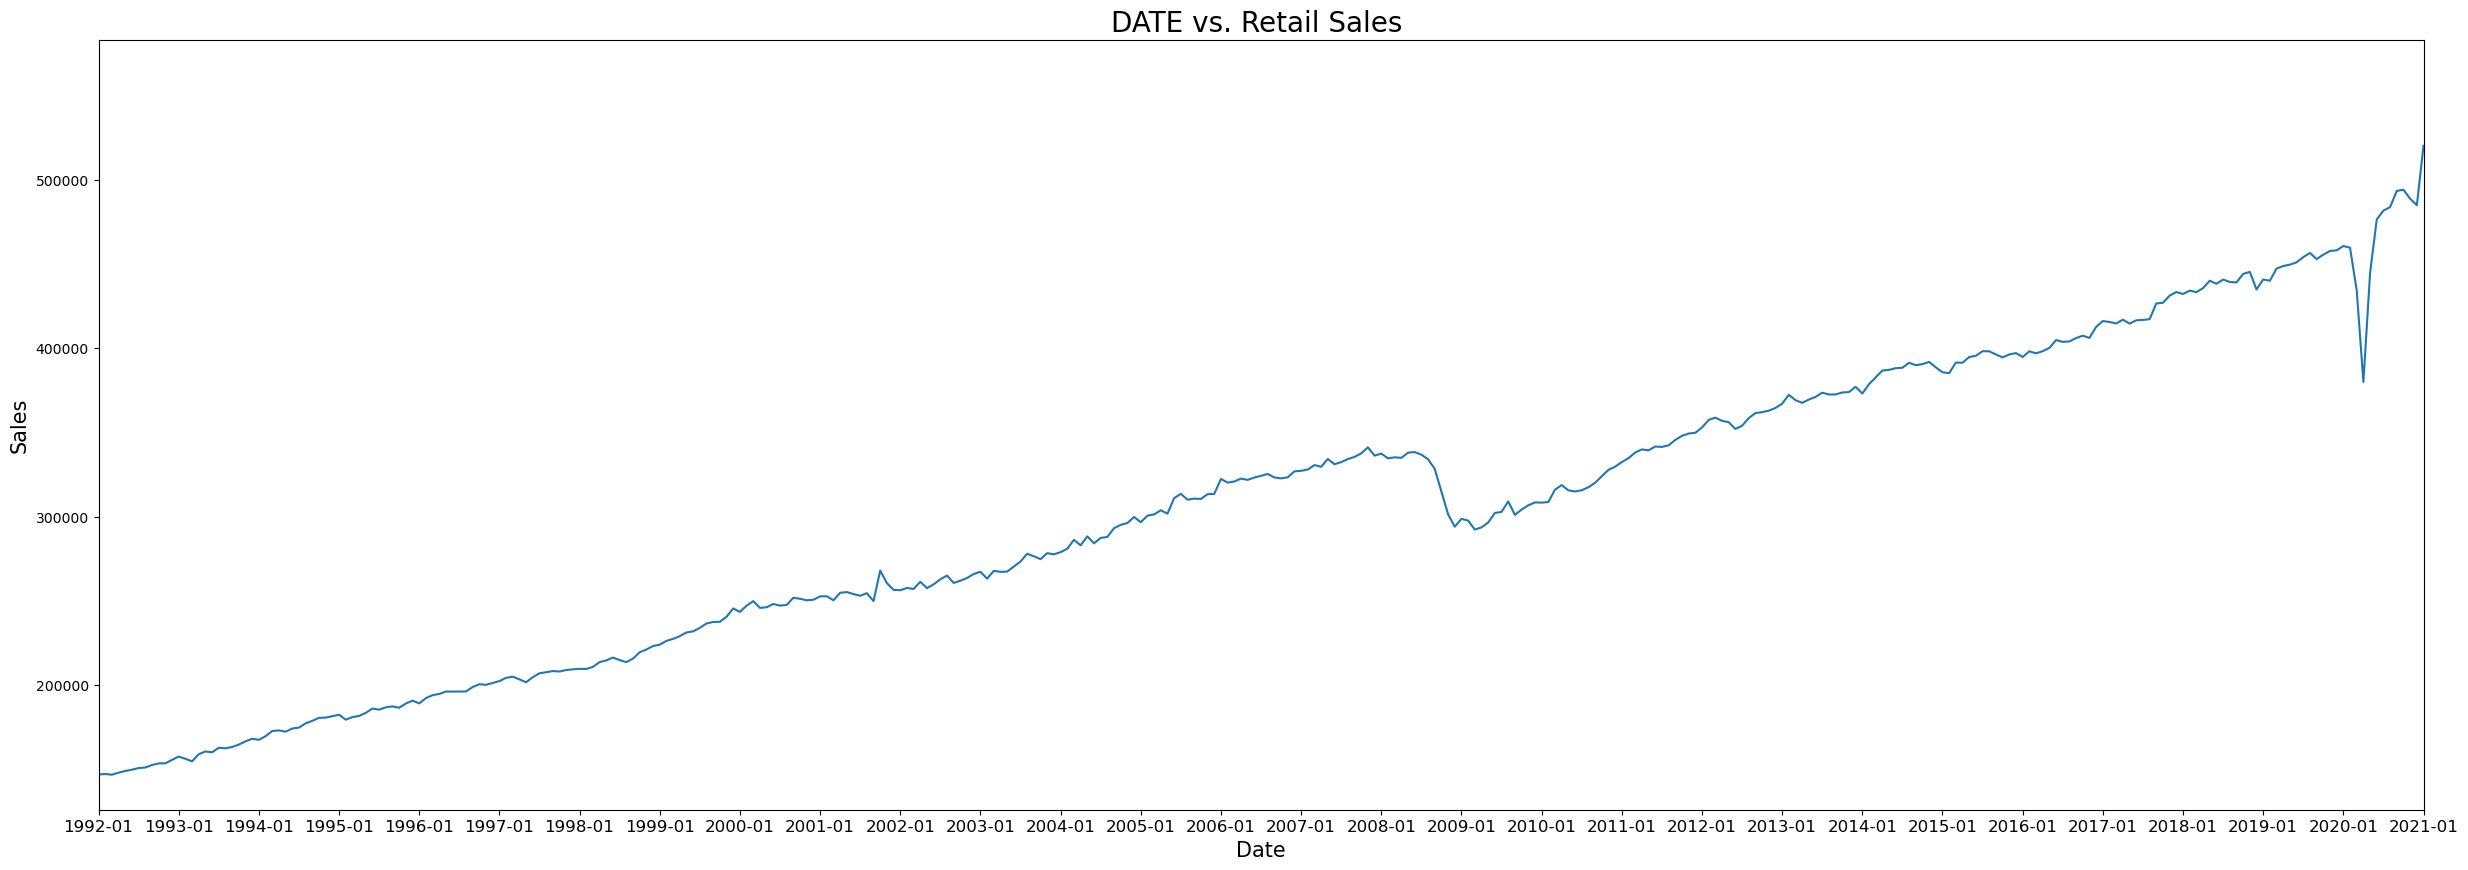

In [388]:
fig = plt.subplots(figsize=(30, 10))
plt.plot(new_df['DATE'], new_df['value'])
plt.title('DATE vs. Retail Sales ', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.xlim(df.index.min(), df.index.max())

# Setting ticks for January of every year
ticks = ['1992-01', '1993-01', '1994-01', '1995-01', '1996-01', '1997-01', '1998-01',
         '1999-01', '2000-01', '2001-01', '2002-01', '2003-01', '2004-01', '2005-01', 
         '2006-01', '2007-01', '2008-01', '2009-01', '2010-01', '2011-01', '2012-01',
         '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01',
         '2020-01', '2021-01']
plt.xticks(ticks, fontsize=12)

The plot shows a relatively linear increase in retail sales over time. However, there are 2 notable 'dips' occuring in early 2009, and mid to late 2020.

## 2. Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.

In [389]:

# Creating mask of the date range
#greater than equal to 2020-07 and smaller than equal to 2021-06
mask = (new_df['DATE'] >= '2020-07') & (new_df['DATE'] <= '2021-06')
train_mask = (new_df['DATE'] < '2020-07') | (new_df['DATE'] > '2021-06')
test_set =  new_df.loc[mask]
train_set = new_df.loc[train_mask]

print(train_set.head())
print(test_set.head())

      DATE     value
0  1992-01  146925.0
1  1992-02  147223.0
2  1992-03  146805.0
3  1992-04  148032.0
4  1992-05  149010.0
        DATE     value
342  2020-07  481627.0
343  2020-08  483716.0
344  2020-09  493327.0
345  2020-10  493991.0
346  2020-11  488652.0


## 3. Use the training set to build a predictive model for the monthly retail sales.

In [390]:
# Using ARIMA model for time series predictive modeling 
# Using ARIMA because of general upwards trend
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_set['value'], order=(1, 0, 1))
model_fit = model.fit()

/Users/troyquicksall/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/troyquicksall/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/troyquicksall/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/troyquicksall/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


## 4. Use the model to predict the monthly retail sales on the last year of data.

In [391]:

# Generating predictions from the model
test_pred = model_fit.get_forecast(steps=len(test_set))
test_series = pd.Series(test_pred.predicted_mean)

/Users/troyquicksall/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


## 5. Report the RMSE of the model predictions on the test set.

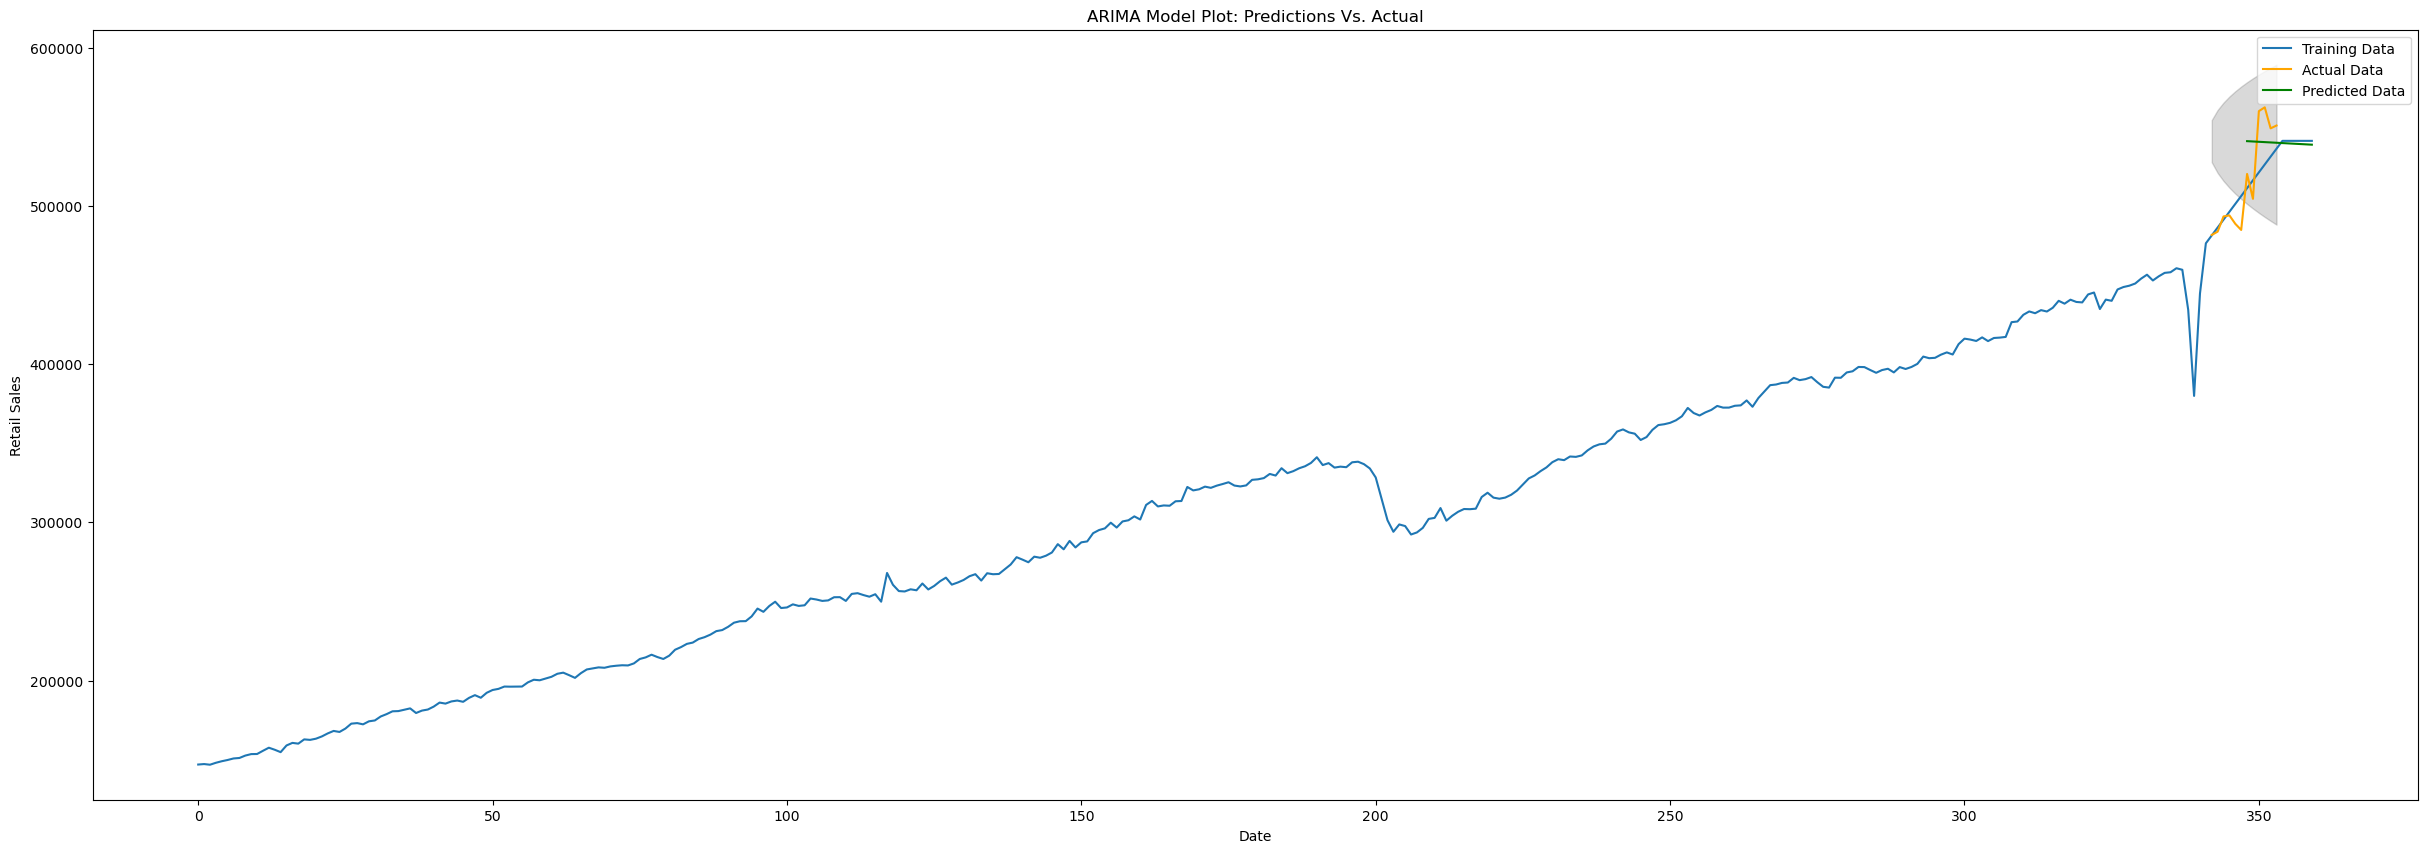

RMSE: 40447.218994873685


In [392]:
from sklearn.metrics import mean_squared_error


# Calculating the root mean squared error
mse = mean_squared_error(test_set['value'], test_series)
rmse = mse**0.5

# Plot comparing predicted vs actual
plt.figure(figsize=(30,10))
plt.plot(train_set['value'], label='Training Data')
plt.plot(test_set['value'], label='Actual Data', color='orange')
plt.plot(test_series, label='Predicted Data', color='green')
plt.fill_between(test_set.index, 
                 test_pred.conf_int().iloc[:, 0], 
                 test_pred.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Plot: Predictions Vs. Actual')
plt.xlabel('Date')
plt.ylabel('Retail Sales')
plt.legend()

plt.show()

print('RMSE:', rmse)